<h1> <center> Build a song recommender system  </h1> <center>
    <h2> Using scikit-learn </h2>
    
Source: [ML Foundations, Washington University-Coursera](https://www.coursera.org/learn/ml-foundations/supplement/XkB9D/recommending-songs-assignment)
    
  

In [1]:
import pandas as pd

# <center> Load and Explore Data <center>

### <center>Load music data <center>

In [2]:
song_data_df = pd.read_csv('./data/song_data.csv### <center>Load product review data <center>')

In [5]:
song_data_df

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...
1116604,276e43ad698705e5011e5091f367d951b21246f5,SOWTYVO12AB0180BDA,8,Surf Wax America,Weezer,Surf Wax America - Weezer
1116605,276e43ad698705e5011e5091f367d951b21246f5,SOWZHOY12A6701F9FC,1,Kill The King,Megadeth,Kill The King - Megadeth
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,You Think I Ain\'t Worth A Dollar_ But I Feel ...,Queens Of The Stone Age,You Think I Ain\'t Worth A Dollar_ But I Feel ...
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Superbeast,Rob Zombie,Superbeast - Rob Zombie


### <center> Explore <center> 

__Show the most popular songs in the dataset__

In [11]:
song_data_df['song'].value_counts().iloc[0:5]

Sehr kosmisch - Harmonia                                   5970
Undo - Björk                                               5281
You\'re The One - Dwight Yoakam                            4806
Dog Days Are Over (Radio Edit) - Florence + The Machine    4536
Revelry - Kings Of Leon                                    4339
Name: song, dtype: int64

<AxesSubplot:title={'center':'Song counts'}, xlabel='Song title', ylabel='Count'>

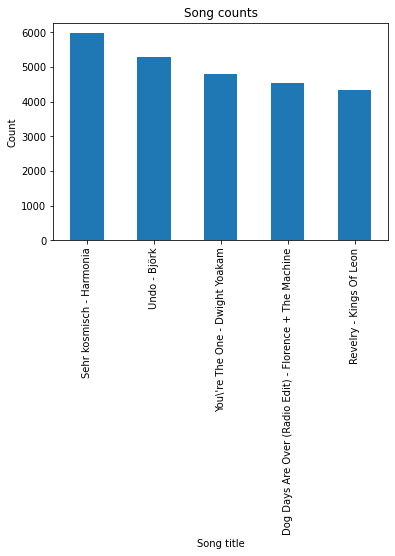

In [15]:
song_data_df['song'].value_counts().iloc[0:5].plot(kind='bar'
                                                    , title='Song counts'
                                                    , rot = 90
                                                    , xlabel='Song title'
                                                    , ylabel='Count'
                                                   )

__Count the number of unique users in the data__

In [16]:
users = song_data_df['user_id'].unique()

In [19]:
len(users)

66346

<br>

# <center> Create a song recommender <center>

__Split into train and test sets__

In [20]:
training_set = song_data_df.sample(frac=0.8,random_state=42)
test_set = song_data_df.drop(training_set.index)

## Create a very simple popularity recommender

In [8]:
popularity_model = turicreate.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.335376s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [9]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
696787172dd3f5169dc94deef97e427cee86147d ...,Sehr kosmisch - Harmonia,4754.0,1
696787172dd3f5169dc94deef97e427cee86147d ...,Undo - Björk,4227.0,2
696787172dd3f5169dc94deef97e427cee86147d ...,You're The One - DwightYoakam ...,3781.0,3
696787172dd3f5169dc94deef97e427cee86147d ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
696787172dd3f5169dc94deef97e427cee86147d ...,Revelry - Kings Of Leon,3527.0,5
696787172dd3f5169dc94deef97e427cee86147d ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
696787172dd3f5169dc94deef97e427cee86147d ...,Secrets - OneRepublic,3148.0,7
696787172dd3f5169dc94deef97e427cee86147d ...,Hey_ Soul Sister - Train,2538.0,8
696787172dd3f5169dc94deef97e427cee86147d ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
696787172dd3f5169dc94deef97e427cee86147d ...,Tive Sim - Cartola,2521.0,10


In [10]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c27baaf4da66de473a267747a9f012b73671a005 ...,Sehr kosmisch - Harmonia,4754.0,1
c27baaf4da66de473a267747a9f012b73671a005 ...,Undo - Björk,4227.0,2
c27baaf4da66de473a267747a9f012b73671a005 ...,You're The One - DwightYoakam ...,3781.0,3
c27baaf4da66de473a267747a9f012b73671a005 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c27baaf4da66de473a267747a9f012b73671a005 ...,Revelry - Kings Of Leon,3527.0,5
c27baaf4da66de473a267747a9f012b73671a005 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c27baaf4da66de473a267747a9f012b73671a005 ...,Secrets - OneRepublic,3148.0,7
c27baaf4da66de473a267747a9f012b73671a005 ...,Hey_ Soul Sister - Train,2538.0,8
c27baaf4da66de473a267747a9f012b73671a005 ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
c27baaf4da66de473a267747a9f012b73671a005 ...,Tive Sim - Cartola,2521.0,10


# Build a recommender with personalization

In [11]:
personalized_model = turicreate.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.291925s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.228ms                        | 1.5        |

| 8.583ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 317.525ms                           | 45.5             | 4535            |

| 542.217ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.57228s

## Apply personalized model to make song recommendations

In [12]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
696787172dd3f5169dc94deef97e427cee86147d ...,Senza Una Donna (WithoutA Woman) - Zucchero / ...,0.01702657767704555,1
696787172dd3f5169dc94deef97e427cee86147d ...,Oceanside - Angels OfLight & Akron/Family ...,0.016382698501859392,2
696787172dd3f5169dc94deef97e427cee86147d ...,Bolinha De Papel - JoãoGilberto ...,0.013928570917674474,3
696787172dd3f5169dc94deef97e427cee86147d ...,La Fokin Moda - Calle 13,0.013313463756016322,4
696787172dd3f5169dc94deef97e427cee86147d ...,Wendy Clear - Blink-182,0.012755100216184343,5
696787172dd3f5169dc94deef97e427cee86147d ...,Sin Coro - Calle 13,0.011813687426703317,6
696787172dd3f5169dc94deef97e427cee86147d ...,Sin Exagerar - Calle 13Featuring Tego Calderón ...,0.011438054697854179,7
696787172dd3f5169dc94deef97e427cee86147d ...,Un Beso de Desayuno -Calle 13 ...,0.011053928307124547,8
696787172dd3f5169dc94deef97e427cee86147d ...,No Hay Nadie Como Tú -Calle 13 Featuring Café ...,0.010828912258148193,9
696787172dd3f5169dc94deef97e427cee86147d ...,La Tripleta - Calle 13,0.010348715952464513,10


In [13]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
c27baaf4da66de473a267747a9f012b73671a005 ...,Unite (2009 DigitalRemaster) - Beastie Boys ...,0.0362800657749176,1
c27baaf4da66de473a267747a9f012b73671a005 ...,Sincerité Et Jalousie -Alliance Ethnik ...,0.034049659967422485,2
c27baaf4da66de473a267747a9f012b73671a005 ...,Invalid - Tub Ring,0.029410511255264282,3
c27baaf4da66de473a267747a9f012b73671a005 ...,Undo - Björk,0.02839714288711548,4
c27baaf4da66de473a267747a9f012b73671a005 ...,Just Dance - Lady GaGa /Colby O'Donis ...,0.026268382867177326,5
c27baaf4da66de473a267747a9f012b73671a005 ...,You're The One - DwightYoakam ...,0.02486183245976766,6
c27baaf4da66de473a267747a9f012b73671a005 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,0.024435500303904217,7
c27baaf4da66de473a267747a9f012b73671a005 ...,Rock Star - N.E.R.D.,0.02424296736717224,8
c27baaf4da66de473a267747a9f012b73671a005 ...,Tive Sim - Cartola,0.024048149585723877,9
c27baaf4da66de473a267747a9f012b73671a005 ...,Como Duele (Album) -Ricardo Arjona ...,0.02391629417737325,10


# Apply model to find similar songs in the data set

In [14]:
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [15]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [16]:
model_performance = turicreate.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 63795.9

recommendations finished on 2000/2931 queries. users per second: 71599.9


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.020812009553053557 | 0.005502126100897849 |
|   2    | 0.022176731490958727 | 0.011113071885845682 |
|   3    | 0.021721824178323683 | 0.016581022184911653 |
|   4    | 0.020726714431934502 | 0.021039929970329163 |
|   5    | 0.019447287615148447 | 0.025291409375339774 |
|   6    | 0.018139429091322642 | 0.027839267143258968 |
|   7    | 0.017692645123556085 | 0.031679163741599785 |
|   8    | 0.016845786421016713 | 0.034345257835534194 |
|   9    |  0.016452481140301   | 0.03819961171547661  |
|   10   | 0.015660184237461662 | 0.04024899623671373  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 47236.7

recommendations finished on 2000/2931 queries. users per second: 56069.5


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.01671784373933811  | 0.005205870175163933 |
|   2    | 0.014329580348004094 | 0.008332528573060818 |
|   3    | 0.01296485841009894  | 0.010494437515931888 |
|   4    | 0.012367792562265436 | 0.013178686054837527 |
|   5    | 0.011668372569089038 | 0.015863193063807186 |
|   6    | 0.011372682815876277 | 0.01793583515692013  |
|   7    | 0.010771555295608514 | 0.019573763739577484 |
|   8    | 0.010022176731490957 | 0.020455261217799593 |
|   9    | 0.009666780393494811 | 0.022344607324136512 |
|   10   | 0.009245991129307416 | 0.023585595949976713 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.